In [1]:
from bilayer_clusters import trajIO
from bilayer_clusters import jenks_clusters
from bilayer_clusters import displacement
from bilayer_clusters import iter_cluster

In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
L, com_lipids, com_chol = trajIO.decompress("comTraj.npz")
com_lipids, com_chol = trajIO.translateZ(com_lipids, com_chol)
Nconf = L.shape[0]
nlog = 46
Nblock = Nconf // nlog

In [4]:
cluster_sizes = [3,4]
times = list(range(1,46))
com_lipids = displacement.block_displacement(L,com_lipids)
com_chol = displacement.block_displacement(L,com_chol)

In [5]:
#cluster dict
clusters = {} #cluster[nblock][time][layer][cluster_size]
for block in range(Nblock):
    clusters[block] = {}
    for t in times:
        clusters[block][t] = {}
        clusters[block][t]['lipids'] = {}
        clusters[block][t]['chol'] = {}
        for layer in ['upper','lower']:
            clusters[block][t]['lipids'][layer] = {}
            clusters[block][t]['chol'][layer] = {}

In [6]:
#running

for block in range(Nblock):
    for time in times:
        for size in cluster_sizes:
            t = block*nlog + time

            upper_lipids, lower_lipids = trajIO.layering(com_lipids[t])
            upper_chol, lower_chol = trajIO.layering(com_chol[t])
            
            clusters[block][time]['lipids']['upper'][size] = jenks_clusters.clusters(upper_lipids,size)
            clusters[block][time]['lipids']['lower'][size] = jenks_clusters.clusters(lower_lipids,size)
            
            clusters[block][time]['chol']['upper'][size] = jenks_clusters.clusters(upper_chol,size)
            clusters[block][time]['chol']['lower'][size] = jenks_clusters.clusters(lower_chol,size)
        

In [9]:
def display(cluster):
    colors = []

    for group in cluster:
        x, y = zip(*group)
        plt.scatter(x, y)
    return

In [25]:
#testing iter_cluster
first = iter_cluster.Cluster(clusters[0][35]['lipids']['upper'][3][0],L,1.15)

49

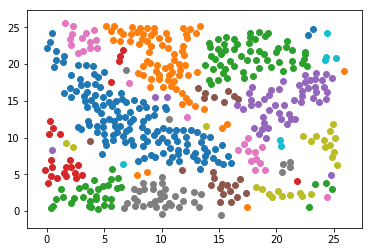

In [26]:
display(first.spitXY())
len(first.getSizes())

28

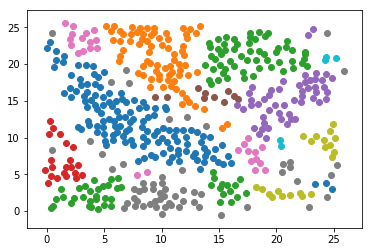

In [27]:
first.singletonMerge()
display(first.spitXY())
len(first.getSizes())